<a href="https://colab.research.google.com/github/CharlotteLaw/Data-Science-on-Dogs/blob/main/Dog_Analysis_with_Data_Science_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Charlotte Law** | Dog Data Science Project

##🌱 Step 1: Preparation
> Importing all the relevant libraries and defining data manipulation functions to be used later.

In [ ]:
!pip install git+https://github.com/data-8/datascience.git

In [29]:
from datascience import *
import numpy as np
import pandas as pd
import warnings
from pathlib import Path
import matplotlib.pyplot as plots
import matplotlib.pyplot as plt


%matplotlib inline
warnings.filterwarnings("ignore")
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

In [30]:
def dollar_to_int(amount):
    if isinstance(amount, str):
        return(amount.replace('$', '').replace(',', ''))
    return(amount)

In [31]:
def value_to_int(amount):
    if isinstance(amount, str):
        return(float(amount))
    return(amount)

In [34]:
categories = ["LIFETIME COST", "POPULARITY IN US", "LONGEVITY", "INTELLIGENCE", "# OF GENETIC AILMENTS"]

##🕹️ Step 2: Data Loading
> Loading in the dataset from an external csv file (dataset sourced from AKC, American Kennel Club).

In [35]:
dog_csv="dog_data.csv"
dog_df = pd.read_csv(dog_csv)
dog_df.head(5)

,Dog breed,Unnamed: 1,category,Unnamed: 3,datadog score,POPULARITY IN US,POPULARITY IN US.1,LIFETIME COST,5 LIFETIME COST,Unnamed: 9,...,Unnamed: 59,"Other regular costs, total per lifetime, $","total per year, $","total, per year, £","toys, presents, treats, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £","one offs, $"
0,Additional info,NaN,American Kennel Club group,NaN,NaN,"1- 173, 1 = most poular, US. American Kennel C...",ranking within breeds with full data only,NaN,"in descending rank (higher score = better), n...",NaN,...,NaN,"if no average lifespan data, then 'no data'",converted to US $ using Google Finance,NaN,averaged across all dog breeds. pet food exclu...,NaN,NaN,NaN,NaN,"Initial outlay: leash, collar, ID tag; food di..."
1,Border Collie,NaN,herding,NaN,3.64,45,39,"$20,143.00",48%,NaN,...,NaN,"13,095","1,046",784.0,121,126.0,244.0,177.0,116.0,200
2,Border Terrier,NaN,terrier,NaN,3.61,80,61,"$22,638.00",14%,NaN,...,NaN,"14,643","1,046",784.0,121,126.0,244.0,177.0,116.0,200
3,Brittany,NaN,sporting,NaN,3.54,30,30,"$22,589.00",16%,NaN,...,NaN,"13,514","1,046",784.0,121,126.0,244.0,177.0,116.0,200
4,Cairn Terrier,NaN,terrier,NaN,3.53,59,48,"$21,992.00",22%,NaN,...,NaN,"14,476","1,046",784.0,121,126.0,244.0,177.0,116.0,200


##💻 Step 3: Data Processing
> Cleaning up the data by removing unnecessary columns and rows, for example, those with "no data" or "NaN". Creating a new dataframe with necessary rows and columns, and manipulating the data types to prepare for data analysis.

#### Cleaning Data

In [36]:
dog_df.iteritems = dog_df.items

for (columnName, columnData) in dog_df.iteritems():
  if 'Unnamed' in  columnName:
    dog_df = dog_df.drop([columnName], axis=1)

dog_df.head(5)

,Dog breed,category,datadog score,POPULARITY IN US,POPULARITY IN US.1,LIFETIME COST,5 LIFETIME COST,INTELLIGENCE,INTELLIGENCE (TRAINABILITY) ranking,LONGEVITY,...,"food per lifetime, $","Other regular costs, total per lifetime, $","total per year, $","total, per year, £","toys, presents, treats, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £","one offs, $"
0,Additional info,American Kennel Club group,NaN,"1- 173, 1 = most poular, US. American Kennel C...",ranking within breeds with full data only,NaN,"in descending rank (higher score = better), n...",1 = easiest to train / learn new commands,"in descending rank (higher score = better), n...","years, weighted average - see note",...,food per week x 52.1775 x average lifespan (co...,"if no average lifespan data, then 'no data'",converted to US $ using Google Finance,NaN,averaged across all dog breeds. pet food exclu...,NaN,NaN,NaN,NaN,"Initial outlay: leash, collar, ID tag; food di..."
1,Border Collie,herding,3.64,45,39,"$20,143.00",48%,1,100%,12.52,...,"3,486","13,095","1,046",784.0,121,126.0,244.0,177.0,116.0,200
2,Border Terrier,terrier,3.61,80,61,"$22,638.00",14%,30,70%,14.00,...,"3,898","14,643","1,046",784.0,121,126.0,244.0,177.0,116.0,200
3,Brittany,sporting,3.54,30,30,"$22,589.00",16%,19,80%,12.92,...,"5,171","13,514","1,046",784.0,121,126.0,244.0,177.0,116.0,200
4,Cairn Terrier,terrier,3.53,59,48,"$21,992.00",22%,35,61%,13.84,...,"3,854","14,476","1,046",784.0,121,126.0,244.0,177.0,116.0,200


In [37]:
dog_df = dog_df.drop([0])

#### Creating new Dataframe
1. **POPULARITY IN US:** 1 (most popular) to n (least popular)
2. **LIFETIME COST:** Average lifetime cost of owning
a specific dog breed
3. **LONGEVITY:** Average life span of a specific dog breed
4. **INTELLIGENCE:** 1 (most intelligent, easiest to train/learn new commands) to n (least intelligent)
5. **Size Category:** small, medium, or large breed dogs.

In [38]:
new_dog_df = dog_df[["Dog breed", "POPULARITY IN US", "LIFETIME COST", "LONGEVITY", "INTELLIGENCE", "# OF GENETIC AILMENTS", "SIZE CATEGORY"]]

In [39]:
new_dog_df.dropna()

,Dog breed,POPULARITY IN US,LIFETIME COST,LONGEVITY,INTELLIGENCE,# OF GENETIC AILMENTS,SIZE CATEGORY
1,Border Collie,45,"$20,143.00",12.52,1,2,medium
2,Border Terrier,80,"$22,638.00",14.00,30,0,small
3,Brittany,30,"$22,589.00",12.92,19,0,medium
4,Cairn Terrier,59,"$21,992.00",13.84,35,2,small
5,Welsh Springer Spaniel,130,"$20,224.00",12.49,31,1,medium
...,...,...,...,...,...,...,...
170,Weimaraner,32,no data,no data,21,1,large
171,Welsh Terrier,99,no data,no data,53,0,small
172,Wire Fox Terrier,100,no data,13.17,51,0,small
173,Wirehaired Pointing Griffon,92,no data,8.80,46,0,medium


### New DF of Cleaned Data

In [40]:
for i in categories:
    new_dog_df = new_dog_df[new_dog_df[i].str.contains("no data") == False]

### Changing Data Types

In [41]:
new_dog_df['LIFETIME COST'] = new_dog_df['LIFETIME COST'].apply(dollar_to_int).astype('float')

for i in categories:
    new_dog_df[i] = new_dog_df[i].apply(value_to_int).astype('float')

new_dog_df.reset_index(inplace=True)

In [42]:
small_dog = new_dog_df[new_dog_df["SIZE CATEGORY"].str.contains("small") == True]
medium_dog = new_dog_df[new_dog_df["SIZE CATEGORY"].str.contains("medium") == True]
large_dog = new_dog_df[new_dog_df["SIZE CATEGORY"].str.contains("large") == True]

In [43]:
filepath = Path('sorted_data.csv')

sorted_data = new_dog_df.sort_values(by=['POPULARITY IN US'], ascending=False)
sorted_data.to_csv(filepath)

##🔍 Step 4: Data Analysis
> Analyzing the data through scatterplots and graphs.

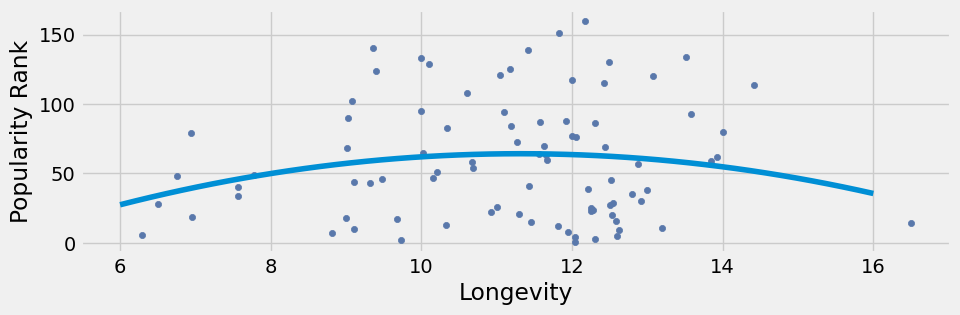

In [44]:
df_scatter=sorted_data.plot.scatter(x="LONGEVITY", y="POPULARITY IN US", c="#5978ab", figsize=(10,3))
df_scatter.set_xlabel("Longevity")
df_scatter.set_ylabel("Popularity Rank")
df_scatter.plot()

model = np.poly1d(np.polyfit(sorted_data["LONGEVITY"], sorted_data["POPULARITY IN US"], 2))

polyline = np.linspace(6, 16, 50)
plt.plot(polyline, model(polyline))
plt.show()

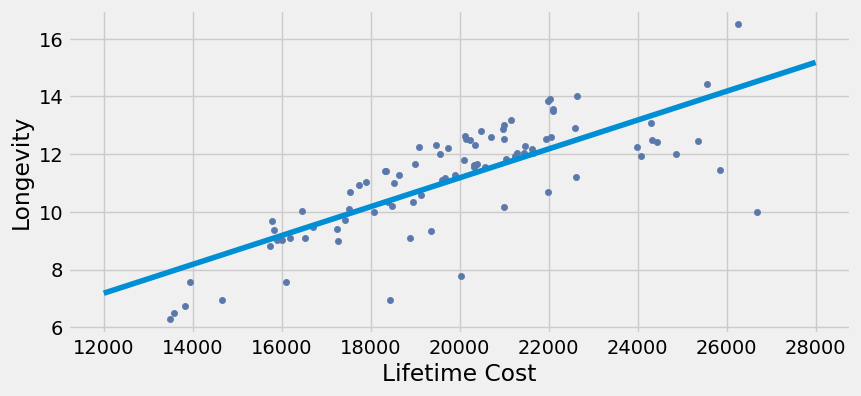

In [45]:
df_scatter=sorted_data.plot.scatter(x="LIFETIME COST", y="LONGEVITY", c="#5978ab", figsize=(9,4))
df_scatter.set_xlabel("Lifetime Cost")
df_scatter.set_ylabel("Longevity")
df_scatter.plot()

model = np.poly1d(np.polyfit(sorted_data["LIFETIME COST"], sorted_data["LONGEVITY"], 1))

polyline = np.linspace(12000, 28000, 50)
plt.plot(polyline, model(polyline))
plt.show()

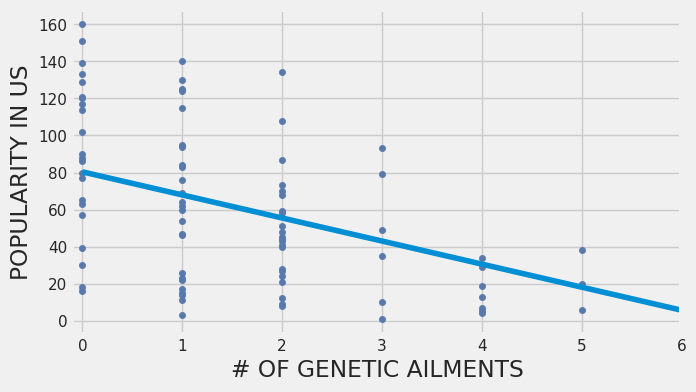

In [ ]:
df_scatter=sorted_data.plot.scatter(x="# OF GENETIC AILMENTS", y="POPULARITY IN US", c="#5978ab", figsize=(7,4))
df_scatter.set_xlabel("# OF GENETIC AILMENTS")
df_scatter.set_ylabel("POPULARITY IN US")
df_scatter.set_xlim(-0.1,6)
df_scatter.plot()

model = np.poly1d(np.polyfit(sorted_data["# OF GENETIC AILMENTS"], sorted_data["POPULARITY IN US"], 1))

polyline = np.linspace(0, 6, 50)
plt.plot(polyline, model(polyline))
plt.show()

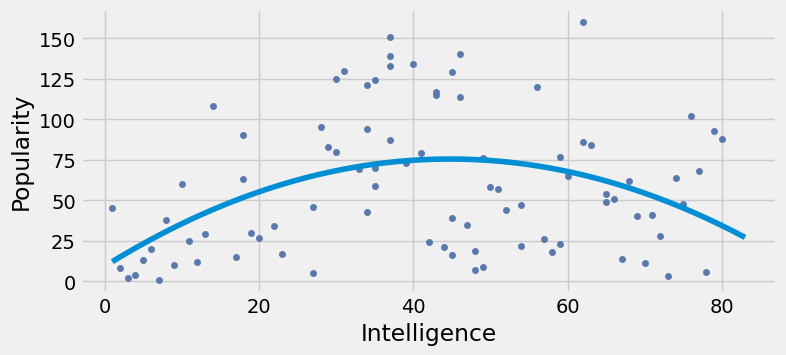

In [46]:
df_scatter=sorted_data.plot.scatter(x="INTELLIGENCE", y="POPULARITY IN US", c="#5978ab", figsize=(8,3.5))
df_scatter.set_xlabel("Intelligence")
df_scatter.set_ylabel("Popularity")
df_scatter.plot()

model = np.poly1d(np.polyfit(sorted_data["INTELLIGENCE"], sorted_data["POPULARITY IN US"], 2))

polyline = np.linspace(1, 83, 50)
plt.plot(polyline, model(polyline))
plt.show()

In [ ]:
df = pd.DataFrame({'Longevity': sorted_data["LONGEVITY"],
                   'Intelligence': sorted_data["INTELLIGENCE"]}, index=sorted_data["index"])

##🐕 Step 5: More Data Analysis
> Comparing data between small, medium, and large dogs

In [ ]:
small_dog_avg = pd.DataFrame(columns = ['LIFETIME COST', 'LONGEVITY', 'INTELLIGENCE', '# OF GENETIC AILMENTS'])

for i in categories:
    small_dog_avg[i] = small_dog[i].mean()
    small_dog_avg = small_dog_avg.append({i : small_dog[i].mean()}, ignore_index = True)

small_dog_avg.drop([1, 2, 3])

,LIFETIME COST,LONGEVITY,INTELLIGENCE,# OF GENETIC AILMENTS
0,20599.935484,12.356452,45.322581,1.548387


In [ ]:
medium_dog_avg = pd.DataFrame(columns = ['LIFETIME COST', 'LONGEVITY', 'INTELLIGENCE', '# OF GENETIC AILMENTS'])

for i in categories:
    medium_dog_avg[i] = medium_dog[i].mean()
    medium_dog_avg = medium_dog_avg.append({i : medium_dog[i].mean()}, ignore_index = True)

medium_dog_avg.drop([1, 2, 3])

,LIFETIME COST,LONGEVITY,INTELLIGENCE,# OF GENETIC AILMENTS
0,19956.37931,11.226897,38.413793,1.482759


In [ ]:
large_dog_avg = pd.DataFrame(columns = ['LIFETIME COST', 'LONGEVITY', 'INTELLIGENCE', '# OF GENETIC AILMENTS'])

for i in categories:
    large_dog_avg[i] = large_dog[i].mean()
    large_dog_avg = large_dog_avg.append({i : large_dog[i].mean()}, ignore_index = True)

large_dog_avg.drop([1, 2, 3])

,LIFETIME COST,LONGEVITY,INTELLIGENCE,# OF GENETIC AILMENTS
0,18957.962963,9.578148,40.555556,2.074074
